# Проект:

# Аналитика в авиакомпании

<font style="color:blue; font-size:200%">•</font> Импортируем данные.

In [0]:
import pandas as pd

In [0]:
models = pd.read_csv('/datasets/query_1.csv')
flights = pd.read_csv('/datasets/query_3.csv')

In [0]:
models

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


В первой таблице список моделей самолетов с количеством рейсов выполненным в сентябре 2018 года.

In [0]:
flights.sample(5)

,city,average_flights
10,Брянск,10.000000
71,Саранск,2.000000
76,Стрежевой,1.000000
36,Кызыл,1.277778
61,Орск,1.590909


Во второй таблице список городов и среднее количество количеством рейсов прибывающих за день в сентябре 2018 года.

In [0]:
models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [0]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


<font style="color:blue; font-size:200%">•</font> Таблички полные и типы данных соответствуют содержанию.

<font style="color:blue; font-size:200%">•</font> Выберем TOP10 городов по количеству рейсов.

In [0]:
top_flights = flights.sort_values(by='average_flights', ascending = False).head(10)
top_flights

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


<font style="color:pink; font-size:400%">•</font> Построим графики.

<font style="color:pink; font-size:200%">•</font> Модели самолетов и количество рейсов.

In [0]:
import matplotlib.pyplot as plt

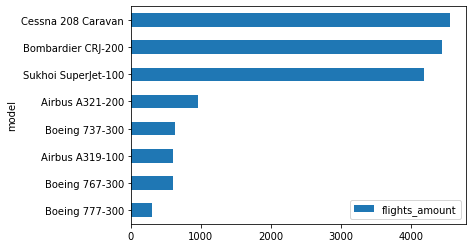

In [0]:
models.sort_values(by='flights_amount').plot(kind='barh', y='flights_amount', x='model')

- На первом месте по количеству рейсов оказывается **Cessna 208 Caravan** *(американский лёгкий одномоторный турбовинтовой самолёт общего назначения с неубирающимся шасси. Используется на авиалиниях малой протяжённости. Экипаж самолёта состоит из одного пилота, базовая модель перевозит девять пассажиров).*


- На 2-м месте **Bombardier CRJ-200** *(небольшой самолет канадского производства, который может перевозить до 50 пассажиров).*


- На 3-м **Sukhoi SuperJet-100** *(пассажирский самолет отечественного производства,  предназначенный для перевозки 98 пассажиров на дальность 3000 или 4600 км).*


- Ниже идут большие самолеты вместимостью от 100 человек.


- Меньше всего рейсов совершил **Boeing 777-300**, который может перевозить от 368 пассажиров.

<font style="color:pink; font-size:200%">•</font> Города и количество рейсов.

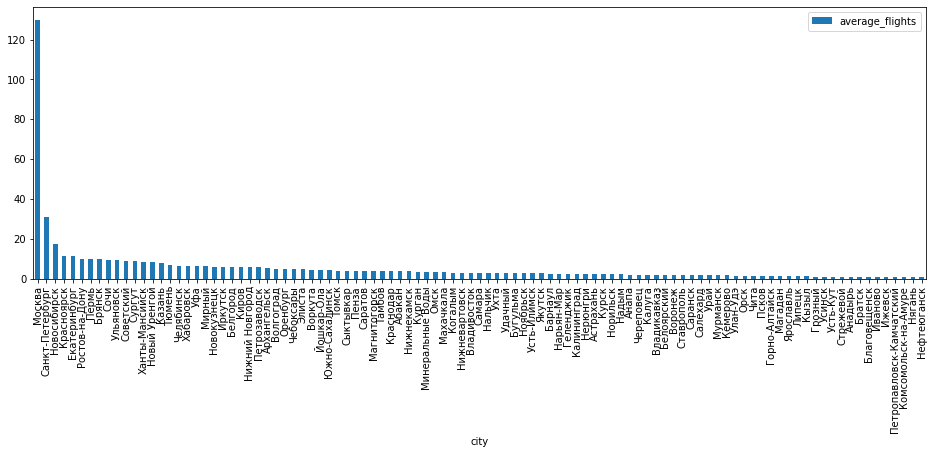

In [0]:
(flights
    .sort_values(by='average_flights', ascending = False)
    .reset_index(drop=True)
    .plot(kind='bar', y='average_flights', x='city', figsize=(16, 5)))

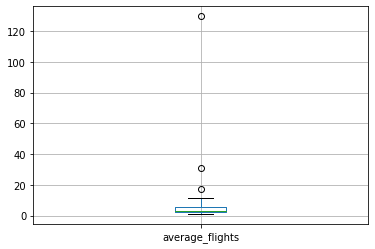

In [0]:
flights.boxplot()

<font style="color:pink; font-size:200%">•</font> ТОП10 городов и количество рейсов.

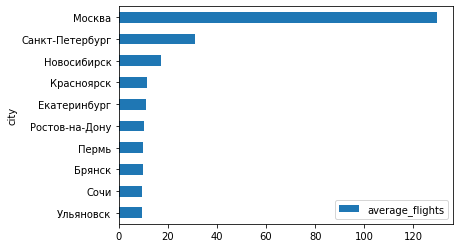

In [0]:
top_flights.sort_values(by='average_flights').plot(kind='barh', y='average_flights', x='city')

Москва бьет все рекорды по количество рейсов за день.  
В 4 раза меньше рейсов прилетает в Санкт-Петербург.  
Еще меньше в Новосибирск.  
В остальных городах количество рейсов за день колеблется между 1 и 11.

<font style="color:green; font-size:400%">•</font> Проверка гипотезы.

In [0]:
# импортируем результат последнего запроса - query_last.csv. В нём следующая информация:
# week_number — номер недели;
# ticket_amount — количество проданных билетов за неделю;
# festival_week — есть ли на этой неделе фестиваль;
# festival_name — название фестиваля.

tickets_festivals = pd.read_csv('/datasets/query_last.csv')
tickets_festivals

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


<font style="color:green; font-size:200%">•</font> Формулируем нулевую гипотезу:  
<font style="background-color:#ffff00">«Средний спрос на билеты во время фестивалей **НЕ** отличается от среднего спроса на билеты в обычное время».</font>  

<i>Альтернативная гипотеза: «Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время».</i>

In [0]:
from scipy import stats as st
import numpy as np

In [0]:
no_fest_df = tickets_festivals[tickets_festivals['festival_name'].isnull()]
no_fest_df

,week_number,ticket_amount,festival_week,festival_name
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [0]:
fest_df = tickets_festivals.dropna()
fest_df

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
6,36,51386,36.0,Видфест


In [0]:
print('Дисперсии выборок отличаются в {} раз.'.format(np.var(fest_df['ticket_amount']) / np.var(no_fest_df['ticket_amount'])))

Дисперсии выборок отличаются в 884.5858060063878 раз.


In [0]:
revenue_fest = fest_df['ticket_amount']
revenue_no_fest = no_fest_df['ticket_amount']
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    revenue_fest, 
    revenue_no_fest,
    equal_var = False)
 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не нашлось оснований отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не нашлось оснований отвергнуть нулевую гипотезу


<font style="background-color:#ffff00">Похоже, что фестивали не влияют на спрос на билеты.</font>